<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Fri Apr 14 22:50:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.89       Driver Version: 465.89       CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   47C    P0    23W /  N/A |   4378MiB /  6144MiB |     30%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Import torch
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch import nn
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)
from tqdm.auto import tqdm 


# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.13.0+cu116


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

test_data = datasets.MNIST(root=".",
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())

train_data_check = train_data[0]
print(train_data_check)
class_names = train_data.classes

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

## 6. Visualize at least 5 different samples of the MNIST training dataset.

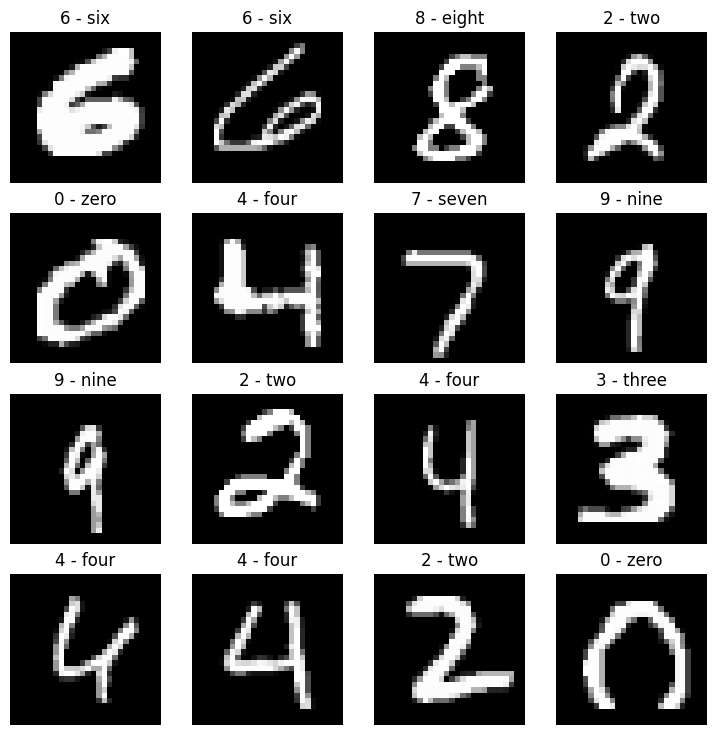

In [5]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001E1449673D0>, <torch.utils.data.dataloader.DataLoader object at 0x000001E1449679D0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
# Create a convolutional neural network 
torch.manual_seed(42)

class MNISTModel(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
    

model_0 = MNISTModel(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)

# check one forward pass
x = model_0(train_features_batch.to(device))
label = x.argmax(dim=1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [9]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)
        print(X.shape)

        # 1. Forward pass
        y_pred = model(X) # in logits
        print(y_pred.shape)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        y_pred_prob = torch.softmax(y_pred,dim=1)
        y_pred_labels = torch.argmax(y_pred_prob, dim = 1)
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred_labels) # Go from probability -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            test_pred_prob = torch.softmax(test_pred, dim = 1)
            test_pred_label = torch.argmax(test_pred_prob, dim = 1)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred_label) # Go from logits -> pred labels
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
accuracy_func = accuracy_fn

epochs = 5
for epoch in range(epochs):
    train_step(model = model_0,
               data_loader = train_dataloader,
               loss_fn = criterion,
               optimizer = optimizer,
               accuracy_fn = accuracy_func,
               device = device)
    test_step(model = model_0,
               data_loader = test_dataloader,
               loss_fn = criterion,
               accuracy_fn = accuracy_func,
               device = device)


torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 2

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

Saving model to: models\mnist_trained_model.pth


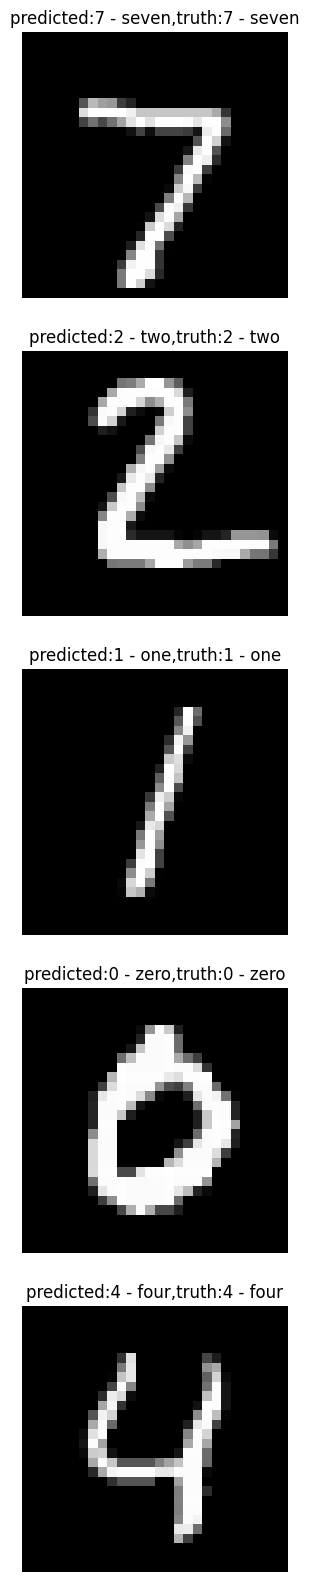

In [11]:
num_samples = 5
fig = plt.figure(figsize=(20, 20))
for i in range(num_samples):
    image_under_test,test_label = test_data[i]
    image_under_test = image_under_test.unsqueeze(dim=1)
    model_0.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        y_pred_logits = model_0(image_under_test.to(device))
        test_pred_prob = torch.softmax(y_pred_logits, dim = 1)
        test_pred_label = torch.argmax(test_pred_prob, dim = 1)
        fig.add_subplot(num_samples, 1, i+1)
        plt.imshow((image_under_test.squeeze()).squeeze(), cmap="gray")
        plt.title(f"predicted:{class_names[test_pred_label]},truth:{class_names[test_label]}")
        plt.axis(False);

from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "mnist_trained_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

Loaded model:
MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)
Model on device:
cuda:0


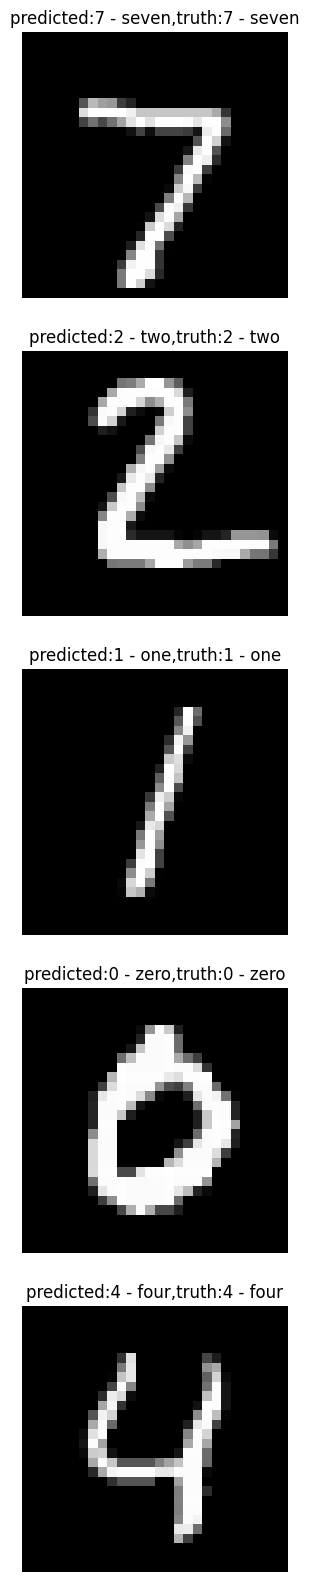

In [13]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = MNISTModel(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)
saved_model_params = torch.load(MODEL_SAVE_PATH)
loaded_model.load_state_dict(saved_model_params)

loaded_model.to(device)

print(f"Loaded model:\n{loaded_model}")
print(f"Model on device:\n{next(loaded_model.parameters()).device}")

num_samples = 5
fig = plt.figure(figsize=(20, 20))
for i in range(num_samples):
    image_under_test,test_label = test_data[i]
    image_under_test = image_under_test.unsqueeze(dim=1)
    loaded_model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        y_pred_logits = loaded_model(image_under_test.to(device))
        test_pred_prob = torch.softmax(y_pred_logits, dim = 1)
        test_pred_label = torch.argmax(test_pred_prob, dim = 1)
        fig.add_subplot(num_samples, 1, i+1)
        plt.imshow((image_under_test.squeeze()).squeeze(), cmap="gray")
        plt.title(f"predicted:{class_names[test_pred_label]},truth:{class_names[test_label]}")
        plt.axis(False);